## Plotting utils  
\- 그림을 그리기 위한 코드이니 참고만 해주세요!  
\- Bivariate Normal Distribution의 ellipse를 그리고 좌표 찍어주는 Plotting tool입니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def plot_gaussian_from_points(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if len(x) != len(y):
        raise ValueError("x and y must be the same size")
    if len(x) < 2:
        raise ValueError("Need more data.")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def plot_gaussian_from_parameters(mean, cov, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    Parameters
    ----------
	mean : array-like, shape (2, )
    	Mean vector
    cov : array-like, shape (2,2)
    	Covariance matrix
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if len(mean) != 2:
        raise ValueError("Mean vector length should be 2.")
    if (cov.shape != (2, 2)):
    	raise ValueError("Covariance should be a 2x2 matrix.")
    #checking if cov is symmetric pos semidefinite
    if(cov[0, 1] != cov[1, 0]):
        raise ValueError("Covariance should be symmetric.")
    if(cov[0, 0] < 0 or cov[0, 0]*cov[1,1] - cov[0,1]**2 < 0):
        raise ValueError("Covariance should be positive semidefinite.")

    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mean[0]

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mean[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


# from random import random

# x = np.array([random()*5 for i in range(500)])
# y = np.array([random()*5 for i in range(500)])
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.scatter(x, y)
# print(plot_gaussian_from_points(x, y, ax, n_std=1, edgecolor='red'))
# #print(plot_gaussian_from_parameters(np.array([2.5, 2.5]), np.cov(x, y), ax, n_std=1, edgecolor='red'))
# plt.show()

## Gibbs Sampling Mechanism (.gif 생성)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gif
# gif 가 잘 안 읽히신다면 아래 코드로 설치해주세요
# !pip install -U gif
# !pip install "gif[matplotlib]"
from IPython.display import Image
from random import random

**요기 아래 두 개 블록이 핵심입니다 (conditional_sampler, gibbs_sampler)**  
###**HW**
conditional_sampler "#채워주세요!" 부분 code 작성해주시면 됩니다.

$p(x_0|x_1) \ \sim \ N(\mu_0 + \Sigma_{01}\Sigma_{11}^{-1}(x_1-\mu_1), \Sigma_{00}-\dfrac{\Sigma_{01}^{2}}{\Sigma_{11}})$ 
임을 이용하여 conditional sampler를 다음과 같이 구현할 수 있다.

In [8]:
def conditional_sampler(sampling_index, current_x, mean, cov):
    conditioned_index = 1 - sampling_index # 두 r.v. 중에 뭘 sampling할지 결정
    a = cov[sampling_index, sampling_index] # Sigma00
    b = cov[sampling_index, conditioned_index]  # Sigma01
    c = cov[conditioned_index, conditioned_index]  # Sigma11
    
    mu = mean[sampling_index]+(b*(current_x[conditioned_index]-mean[conditioned_index]))/c
    sigma = np.sqrt(a-(b**2)/c)
    new_x = np.copy(current_x)
    new_x[sampling_index] = np.random.randn()*sigma + mu
    # [x_0, x_1] 꼴의 1x2 np.array를 return
    return new_x

한 차원 단위로 sampling 한다는 것은 $p(x_0|x_1)$로부터 $x_0$을 뽑고, $p(x_1|x_0)$로부터 $x_1$를 뽑는 것을 반복하여 $(x_0, x_1)$의 sample을 generate하는 것으로 이해하면 된다.  
  
이제 $\mu, \Sigma$가 input으로 주어진 상황에서 Gibbs Sampler를 이용해 표본을 추출할 때 원래의 모분포에 점점 수렴하는 방식으로 scatter plot이 찍히고 ellipse가 변화하는 것을 볼 수 있다. (여기서 ellipse는 joint distribution의 대략적인 structure를 나타내는 것)

## **HW**
여기에서는 첫번째 sample[0] 자리에 initial point로 설정한 변수를 넣으시면 됩니다! 시간이 조금 걸리실 수 있지만 마지막에 함수를 실행하실 때 initial point를 [-0.9,-0.9]가 아닌 다른 값으로 넣어서 관찰해보시면 좋을 것 같아요!

In [9]:
def gibbs_sampler(initial_point, num_samples, mean, cov, create_gif=True):
    """
    [input 형태]
    initial_point = [x_0, x_1] = [-9.0, -9.0]
    num_samples = 100
    mean = np.array([0, 0])
    cov = np.array([[10, 3], 
                    [3, 5]])
    """
    frames = []  # for GIF
    
    point = np.array(initial_point)
    samples = np.empty([num_samples+1, 2])  # sampled points
    samples[0] = point
    tmp_points = np.empty([num_samples, 2]) # inbetween points (중간저장소)

    for i in range(num_samples):
        # 요 for loop이 gibbs sampler 핵심
        # point = [x_0, x_1]
        
        # Sample from p(x_0|x_1)
        point = conditional_sampler(0, point, mean, cov)
        tmp_points[i] = point
        if(create_gif):
            frames.append(plot_samples(samples, i+1, tmp_points, i+1, title="Num Samples: " + str(i)))
            
        # Sample from p(x_1|x_0)
        point = conditional_sampler(1, point, mean, cov)
        samples[i+1] = point
        if(create_gif):
            frames.append(plot_samples(samples, i+2, tmp_points, i+1, title="Num Samples: " + str(i+1)))
            
    if(create_gif):
        return samples, tmp_points, frames
    else:
        return samples, tmp_points

In [10]:
@gif.frame
def plot_samples(samples, num_samples, tmp_points, num_tmp, title="Gibbs Sampling", xlims=(-11, 11), ylims=(-11, 11)):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    
    # Plot the true distribution
    plot_gaussian_from_parameters(mean, cov, ax, n_std=2, edgecolor='g', alpha=0.5, label="True Distribution")
    
    # Plot sampled points
    ax.scatter(samples[:num_samples, 0], samples[:num_samples, 1], c='b', s=10, label="Sampled Points")
    ax.scatter(samples[0, 0], samples[0, 1], marker='*', c='g', s=60, label="Initial Point")
    
    # Plot samples from conditional distribution
    ax.scatter(tmp_points[:num_tmp, 0], tmp_points[:num_tmp, 1], c='r', alpha=0.4, s=5, label="Temporary Points")
    
    # Keeping the axes scales same for good GIFS
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    # Plot lines
    if(num_tmp > 0):
        ax.plot([samples[num_samples-1, 0], tmp_points[num_tmp-1, 0]], 
                [samples[num_samples-1, 1], tmp_points[num_tmp-1, 1]], c='k', alpha=0.25)
        # Plot estimated Gaussian, ignoring the starting point
        if(num_samples > 2):
            plot_gaussian_from_points(samples[1:num_samples, 0], samples[1:num_samples, 1], 
                                      ax, n_std=2, edgecolor='b', alpha=0.5, label="Estimated Distribution")
    
    ax.legend(loc='upper left')
    ax.set_title(title)

## Execution

In [93]:
mean = np.array([0, 0])
cov = np.array([[10, -9.8], 
                [-9.8, 10]])

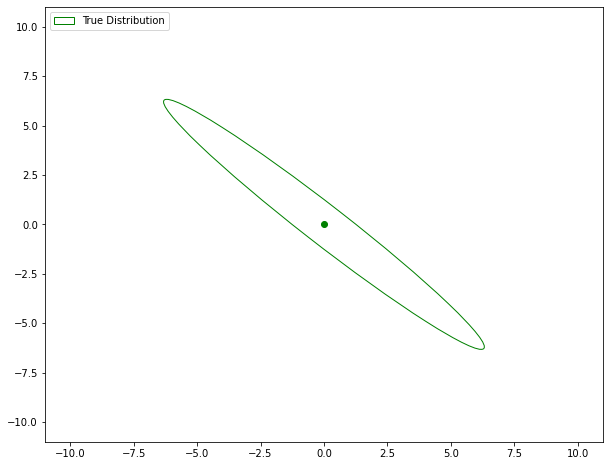

In [94]:
# Plot true distribution
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()
plot_gaussian_from_parameters(mean, cov, ax, n_std=2, edgecolor='g', label="True Distribution")
ax.scatter(mean[0], mean[1], c='g')
ax.set_xlim((-11, 11))
ax.set_ylim((-11, 11))
ax.legend(loc='upper left')
plt.show()

In [95]:
initial_point = [-9.0, -9.0]
num_samples = 500
samples, tmp_points, frames = gibbs_sampler(initial_point, num_samples, mean, cov, create_gif=True)

In [96]:
# Creating the GIF
# 초당 한 번 update 할 수 있게 느으으으린 움짤
gif.save(frames, "gibbs500.gif", duration=500)

initial point가 어디냐에 따라서, covariance structure가 어떠냐에 따라서 수렴 속도 차이를 관찰해보는 것도 추천합니다! 나중에 MCMC를 배울 떄 제대로 이런 convergence가 되는지에 대한 diagnosis를 제대로 익힐 것입니다.